In [122]:
import matplotlib.pyplot as plot
import numpy as np
import pickle
import os

plot.rcParams.update({
    'text.usetex' : True,
    'font.family' : 'Computer Modern Serif',
    'text.latex.preamble' : r'\usepackage{amsmath}'
})

In [107]:
build_dir = '/Users/rrichard/workspaces/rmrresearch/qc101/build'
values_file = open(os.path.join(build_dir, 'values'), 'rb')
errors_file = open(os.path.join(build_dir, 'errors'), 'rb')
values = pickle.load(values_file)
errors = pickle.load(errors_file)
values_file.close()
errors_file.close()

dt = 0.01 # Time step
n_time_steps = len(values) # Number of time steps
n_grid_points = len(values[0]) #Number of grid points
grid = np.linspace(0, 1.0, n_grid_points) # Positions of grid points

In [108]:
from ipywidgets import interact, widgets

def plot_probability(t):
    fig, ax = plot.subplots()
    real_space_pt = values[t]
    ax.errorbar(grid, real_space_pt, xerr=0.0, yerr=errors[t])    
    ax.set_ylim([0, 4])
    plot.show()

def frame_number(n_half):
    #  2 * pi / (E2 - E) is time for 1 full cycle
    # pi / (E2 - E) is time for 1/2 cycle
    # frames are searpated by dt units
    return np.floor(n_half * (np.pi/(19.7392088022-4.9348022005)) / dt)

interact(plot_probability, t=widgets.IntSlider(min=0, max=(n_time_steps - 1), step=1, value=0))

interactive(children=(IntSlider(value=0, description='t'), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_probability(t)>

In [115]:
print(np.floor(frame_number(7)/2))

74.0


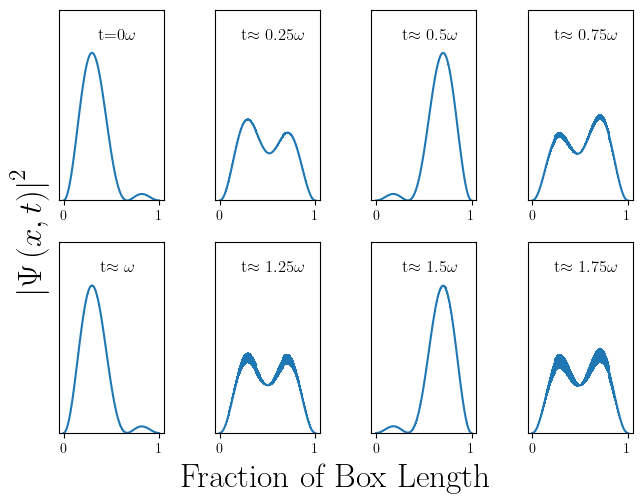

In [142]:
def add_to_axis(ax, values, errors, title):
    ax.errorbar(grid, values, xerr=0.0, yerr=errors)
    ax.set_title(title, y=0.8, x=0.55)
    ax.set_ylim([0, 4])
    ax.get_yaxis().set_ticks([])
    
fig, ax = plot.subplots(2, 4)
fig.tight_layout()
fig.supxlabel('Fraction of Box Length', fontsize=24, y= -0.05)
fig.supylabel(r'$\left|\Psi\left(x,t\right)\right|^2$', fontsize=24, x= -0.01)
add_to_axis(ax[0,0], values[0], errors[0], r't=0$\omega$')
add_to_axis(ax[0,1], values[10], errors[10], r't$\approx 0.25\omega$')
add_to_axis(ax[0,2], values[21], errors[21], r't$\approx 0.5\omega$')
add_to_axis(ax[0,3], values[31], errors[31], r't$\approx 0.75\omega$')
add_to_axis(ax[1,0], values[42], errors[42], r't$\approx\omega$')
add_to_axis(ax[1,1], values[53], errors[53], r't$\approx 1.25\omega$')
add_to_axis(ax[1,2], values[63], errors[63], r't$\approx 1.5\omega$')
add_to_axis(ax[1,3], values[74], errors[74], r't$\approx 1.75\omega$')
plot.show()

In [143]:
print(0.1/19.7392088022)
print(0.1/4.9348022005)

0.005066059182111427
0.020264236728651026
